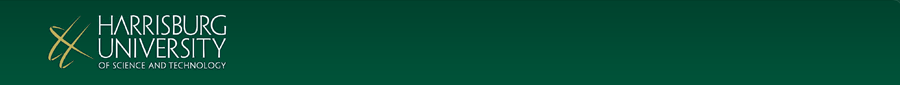
<br>
# CISC 340
# Introduction to Artificial Intelligence
## Lab Booklet #02
## Lab Title: Intelligent Searching
***
### **Instructors**
### Brian Grey
### Chad Van Chu M.S.
***

# Objectives
#### Searching problems are central to gaining an understanding of Artificial Intelligence. In this lab, we will be examining how backtracking search, a modified version of a depth-first tree search, can be used to make intelligent choices. We will be implementing our backtracking search on two classic problem: the map coloring problem and the eight queens problem. While there are many different ways to solve these problems, we’ll see that we can get equivalent results using by setting simple, short circuiting constraints on what is an otherwise naïve algorithm.

#### After completing this lab, you will be able to:

- __Understand the theory of tree traversal__
- __Be able to implement a backtracking search algorithm__
- __Understand the importance of constraint satisfaction in order to short-circuit searches__

# Resources
#### While the lab will explain everything that you need to know, you may want to consult the following sources for additional knowledge:

- [https://en.wikipedia.org/wiki/Depth-first_search](https://en.wikipedia.org/wiki/Depth-first_search)
- [https://en.wikipedia.org/wiki/Backtracking](https://en.wikipedia.org/wiki/Backtracking)
- [https://en.wikipedia.org/wiki/Four_color_theorem](https://en.wikipedia.org/wiki/Four_color_theorem)
- [https://en.wikipedia.org/wiki/Eight_queens_puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle)

# Deliverables
#### For this lab, you will need to submit:

- Jupyter notebook files (.ipynb), named and coded as instructed. 
  - CISC 680 SU 2019 - Lab 07.ipynb

# Instructions & Questions
As discussed in class, a backtracking search algorithm can be thought of as a modified version of depth-first tree search algorithm where constraints are put on solution acceptance. Each of these constraints are specific, tailored to the problem attempting to be solved, and, when triggered, signal to the algorithm that this solution, and any further solutions derived from this solution, will be invalid. The algorithm can then backtrack and try different solutions at the next level up on the tree.

# <u>Part 1: The Four Color Theorm</u>

In 1976, Kenneth Appel and Wolfgang Haken proved that any map can be colored using only 4 colors with the restriction that no two adjacent areas could have the same color. (Bear in mind, two regions that share a corner are not considered to be adjacent.) 

In part 1 of this lab, we will be using a backtracking search paradigm to find acceptable map colorings.

#### 1. Explain, in detail, how you will store the adjacencies that exist in a map and how the data will be structured internally.

The data structure that I will use to store the adjacenies is an adjacencies list(Nested Dictionary). The way the data will be structure is that each term will represent a country, while each term within the dictionary represent the countries that connect to that country. Inside of each connection, we will store another value which represents the wwight, but in this case it will reresent the vertices color.


#### 2. What condition, expressed in terms of your adjacency storage paradigm, will trigger backtracking in this implementation? You may express this in text, pseudocode, or code. Whatever format you choose, make sure that your description is complete.

My idea is that while checking a certain vertex, we will check the neighbors of that vertex to see if any color combination could work. We assign the valid color combinaion to the neighboring vertex, and then check the neighbors of those vertecies. If the coloring doesn't work for a vertex, we backtrack and try a different color. Since the values will be stored inside the nested dictionary, we must iterate through every connection until we find vertex we're looking for and it's corresponding weight. We then check the neighbors of that vertex and their corresponding weights. If the weights are not the same, it's valid and we can assign that color to that vertex. We then iterate through every vertex to assign that color to every single occruance of that vertex.


#### 3. Translate this map into the appropriate format to be read and used by your algorithm.

![Map of South America](SouthAmericaMap.png)

In [ ]:
#Numbers within the vertices would represent the color.
#a = Colombia, b = Venezula, c = Guyana, d = Ecuador, e = Suriname, f = Guyane(fr), h = Brasil, i = Uruguay, j = Paraguay, k = Bolivia, l = Argentina, m = chile, n = peru, 


g = {"a": {"b": None, "h": None, "n": None, "d": None},
     "b": {"a": None, "c": None,"h": None},
     "c": {"b": None, "h": None,"e": None},
     "d": {"a": None, "n": None},
     "e": {"c": None, "h": None,"f": None},
     "f": {"e": None, "h": None},
     "h": {"a": None, "b": None, "c": None, "e": None, "f": None, "i": None, "j": None,"k": None,"l": None, "n": None},
     "i": {"h": None, "l": None},
     "j": {"h": None, "l": None, "k": None},
     "k": {"h": None, "j": None, "l": None,"m": None,"n": None},
     "l": {"h": None, "i": None, "j": None, "k": None, "m": None},
     "m": {"k": None, "l": None, "n": None},
     "n": {"a": None, "d": None, "h": None, "k": None, "m": None}}







#### 4.	Implement a function called `colorMap` which takes a translated map as a parameter and returns a list of tuples expressing a valid coloring of the map using 4 colors. The first element of each tuple should be the name the country in the map and the second tuple should be the color. You may write any helper functions that you wish. Be sure to test this code with the map you created in Question 3, above, as well as with any other graph examples that you wish to use.

In [265]:
class Graph(object):

    def __init__(self, gd = None):
        self.__gd = gd #Graph Dictionary
        self.vertices = self.vertices() #Stores all of our vertices
    
    def vertices(self):
        return list(self.__gd.keys())
        
    def check(self, graph, vertex, c): #Check Function, 
        nw = []
        for x in self.__gd[vertex]: #For all values within the vertex
            if self.__gd[vertex][x] == c: #If current value within the key has the same weight, we can't assign that weight.
                return False 
                
        return True
    
    def colorMap(self, graph):
        c = ["Blue", "Red", "Green", "Yellow"] #0 is Blue, 1 is Red, 2 is Green, 3 is Yellow.
        
        for vertex in self.vertices: #Checking each vertex
            for w in range(len(c)): #Checking each color
                if self.check(graph, vertex, w) == True: #If current color combination was successful
                    for i in self.__gd.keys():# For each key
                        for k in self.__gd[i]:# For each value within the keys
                            if k == vertex: #If the value within the keys is the same as the vertex we're checking
                                if self.__gd[i][k] == None:# And if the weight we're checking hasn't been assigned a value;
                            
                                    self.__gd[i][k] = w #Assign current color to the current vertex we're checking(This will go through every single vertex that is the same and change them all to the same color. For ex. for every occurance of "a" it will change it's weight to whatever color "a" got assigned to.)

        print(self.__gd)
        for e in self.__gd.keys():
            for r in self.__gd[e]:
                if self.__gd[e][r] == None:
                    print("Graph is not colorable")
                    return False
#If the graph cannot be colored fully, the program will return an attempt at creating the color map with those colors. It will have "None" weights scattered through it, indicating that it was not completed with that amount of colors.           
                                
                        
                  
        


    
g = {"a": {"b": None, "h": None, "n": None, "d": None},
     "b": {"a": None, "c": None,"h": None},
     "c": {"b": None, "h": None,"e": None},
     "d": {"a": None, "n": None},
     "e": {"c": None, "h": None,"f": None},
     "f": {"e": None, "h": None},
     "h": {"a": None, "b": None, "c": None, "e": None, "f": None, "i": None, "j": None,"k": None,"l": None, "n": None},
     "i": {"h": None, "l": None},
     "j": {"h": None, "l": None, "k": None},
     "k": {"h": None, "j": None, "l": None,"m": None,"n": None},
     "l": {"h": None, "i": None, "j": None, "k": None, "m": None},
     "m": {"k": None, "l": None, "n": None},
     "n": {"a": None, "d": None, "h": None, "k": None, "m": None}}

#Graph

if __name__ == "__main__":

    
    graph = Graph(g)
    graph.colorMap(g)

{'a': {'b': 1, 'h': 2, 'n': 3, 'd': 1}, 'b': {'a': 0, 'c': 0, 'h': 2}, 'c': {'b': 1, 'h': 2, 'e': 1}, 'd': {'a': 0, 'n': 3}, 'e': {'c': 0, 'h': 2, 'f': 0}, 'f': {'e': 1, 'h': 2}, 'h': {'a': 0, 'b': 1, 'c': 0, 'e': 1, 'f': 0, 'i': 0, 'j': 0, 'k': 1, 'l': 3, 'n': 3}, 'i': {'h': 2, 'l': 3}, 'j': {'h': 2, 'l': 3, 'k': 1}, 'k': {'h': 2, 'j': 0, 'l': 3, 'm': 0, 'n': 3}, 'l': {'h': 2, 'i': 0, 'j': 0, 'k': 1, 'm': 0}, 'm': {'k': 1, 'l': 3, 'n': 3}, 'n': {'a': 0, 'd': 1, 'h': 2, 'k': 1, 'm': 0}}


# <u>Part 2: The Eight Queens Problem</u>

The Eight Queens Problem is a classical puzzle first solved in 1850. The goal of the puzzle is to be able to place 8 queens on a chess board in such a way that none of them can take each other in a single move.

In part 2 of this lab, we will be using a backtracking search paradigm to valid positionings of queens on a chess board.

#### 5. Explain, in detail, how you will represent the chess board and store the positions of the queens within your program.

I will represent the chess board by using an adjacency matrix. I will store the positions of each queen by writing a '1' over the spot it will be at on the board.  


#### 6.	What condition, expressed in terms of your chess board and queens’ positions storage paradigm, will trigger backtracking in this implementation? You may express this in text, pseudocode, or code. Whatever format you choose, make sure that your description is complete.

If the current queen we are trying to place interferes with any of the other queens, we wil backtrack and try a new position with the same queen. If no position is found, we backtrack to the previous queen and look for a new position using that queen. 


#### 7. Implement a function called `queens` which takes a positive integer as a parameter and returns a list of positions which solve the problem. The parameter both represent the number of queens to be placed and the dimensions of the chess board. For example, `queens(8)` is requesting a solution to the classic 8 queens problem on a traditional 8 by 8 chessboard. If you called `queens(6)`, this would request a solution where you are trying to place 6 queens on a 6 by 6 chessboard. You may write any helper functions that you wish.

In [12]:

size = 8 #Determines size of the board. Put the size you want here.

board = [[0 for l in range(size)] for k in range(size)] #Creating a NxN board. Changing the int in the vairable 'size' will change the board size.
def check(row, column): #Checks if any of the queens can take each other
    for i in range(size):
        if board[i][column] == 1: #Checks each column in correspondence to the current position
            return False
    for k in range(size):
        if board[row][k] == 1: #Checks each row in correspondence to the current position
            return False
    for b in range(size): 
        for a in range(size):
            if (board[b][a] == 1): #Checks if a queen is occupying a space, if so, go to next line
                if abs(b - row)  == abs(a - column): # if two pieces are diagonal with each other on a chess board, they will equal the same number if subtracted by each other(Absoulute Value since negatives wouldn't matter in this case). 
                       return False
    return True
    
def queens(size, row):
    
    if row == size: #Base Case, If we checked all rows, then we have checked the entire board.  
        print(board)
        return True
    
    for column in range(size): 
        if (check(row, column)) == True: #Using our check condition
            if board[row][column] != 1: #If the area we're checking isn't already occupied, put a queen there. 
                board[row][column] = 1 
                if queens(size, row + 1) == True: #Checking the next spot of the board until we have a complete solution. 
                    return True
                else:
                    board[row][column] = 0 
                    

    return False
    
    
    

    
queens(size, 0)

[[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0]]


True